In [178]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
data = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
data.columns = ['message', 'rating']
data['message'] = data['message'].str.lower()
data.head()

,message,rating
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [200]:
keywords = ['love', 'great', 'good', 'friendly', 'worth', 'best', 'fast', 'highly', 'yum']
for key in keywords:
    data[str(key)] = data['message'].str.contains(str(key), case=False)

data['rating'] = (data['rating'] == 1)
data.head()

,message,rating,love,great,good,friendly,worth,best,fast,highly,yum
0,wow... loved this place.,True,True,False,False,False,False,False,False,False,False
1,crust is not good.,False,False,False,True,False,False,False,False,False,False
2,not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False
3,stopped by during the late may bank holiday of...,True,True,False,False,False,False,False,False,False,False
4,the selection on the menu was great and so wer...,True,False,True,False,False,False,False,False,False,False


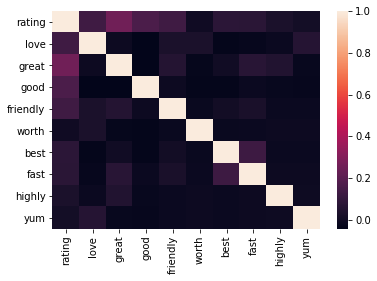

In [201]:
sns.heatmap(data.corr())

In [202]:
data_test = data[['love', 'great', 'good', 'friendly', 'worth', 'best', 'fast', 'highly', 'yum']]
data_target = data['rating']

In [203]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_test, data_target)
predition = bnb.predict(data_test)

(data_target == predition).sum()/len(data)

0.657